In [1]:
# [+] SparkSession 설정
from pyspark.sql import SparkSession

ss = SparkSession.builder.master('local').appName('housing-prices-regression').getOrCreate()

In [4]:
# [+] 주택 가격 데이터에 대한 DataFrame 생성
house_df = ss.read.csv('./data/boston.csv', header=True, inferSchema=True)

In [5]:
house_df.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+---------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|TAX|PTRATIO|     B|LSTAT|MEDV|CAT. MEDV|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+---------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|        0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|        0|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|        1|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|        1|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|        1|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|        0|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|        0|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|

In [6]:
house_df.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: integer (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)
 |-- CAT. MEDV: integer (nullable = true)



In [7]:
# [+] 캐싱하기: DataFrame 을 메모리에 저장
house_df.cache()

DataFrame[CRIM: double, ZN: double, INDUS: double, CHAS: int, NOX: double, RM: double, AGE: double, DIS: double, RAD: int, TAX: int, PTRATIO: double, B: double, LSTAT: double, MEDV: double, CAT. MEDV: int]

In [9]:
# [+] 기본 통계 출력: 보기 불편하다..
# house_df.describe().show() <= 기본통계출력
# house_df.describe().toPandas() <= 이렇게만하면 열이 너무 많아서 안좋음. 이럴때 행과 열을 바꿔주면 보기 편함(전치행렬로 바꿔주기)

In [10]:
# pandas DataFrame 의 형태로 변환하여 출력
house_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CRIM,506,3.6135235573122535,8.601545105332491,0.00632,88.9762
ZN,506,11.363636363636363,23.32245299451514,0.0,100.0
INDUS,506,11.136778656126504,6.860352940897589,0.46,27.74
CHAS,506,0.0691699604743083,0.2539940413404101,0,1
NOX,506,0.5546950592885372,0.11587767566755584,0.385,0.871
RM,506,6.284634387351787,0.7026171434153232,3.561,8.78
AGE,506,68.57490118577078,28.148861406903595,2.9,100.0
DIS,506,3.795042687747034,2.10571012662761,1.1296,12.1265
RAD,506,9.549407114624506,8.707259384239366,1,24


In [11]:
"""
    탐색적 데이터 분석(EDA: Exploratory Data Analysis)
    
"""
# 탐색적 데이터 분석은 말 그대로 데이터 탐색하는 것. 탐색적 데이터 분석을 할 떈 pandas의 메소드들이 편함.

# [+] EDA 를 위해 pandas DataFrame 으로 변환
house_pdf = house_df.toPandas()

In [13]:
house_pdf.head() # 수치만 보고 뭔가 알기 어려움

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [14]:
import seaborn as sns
sns.set()  # set plot 스타일 적용(기본)

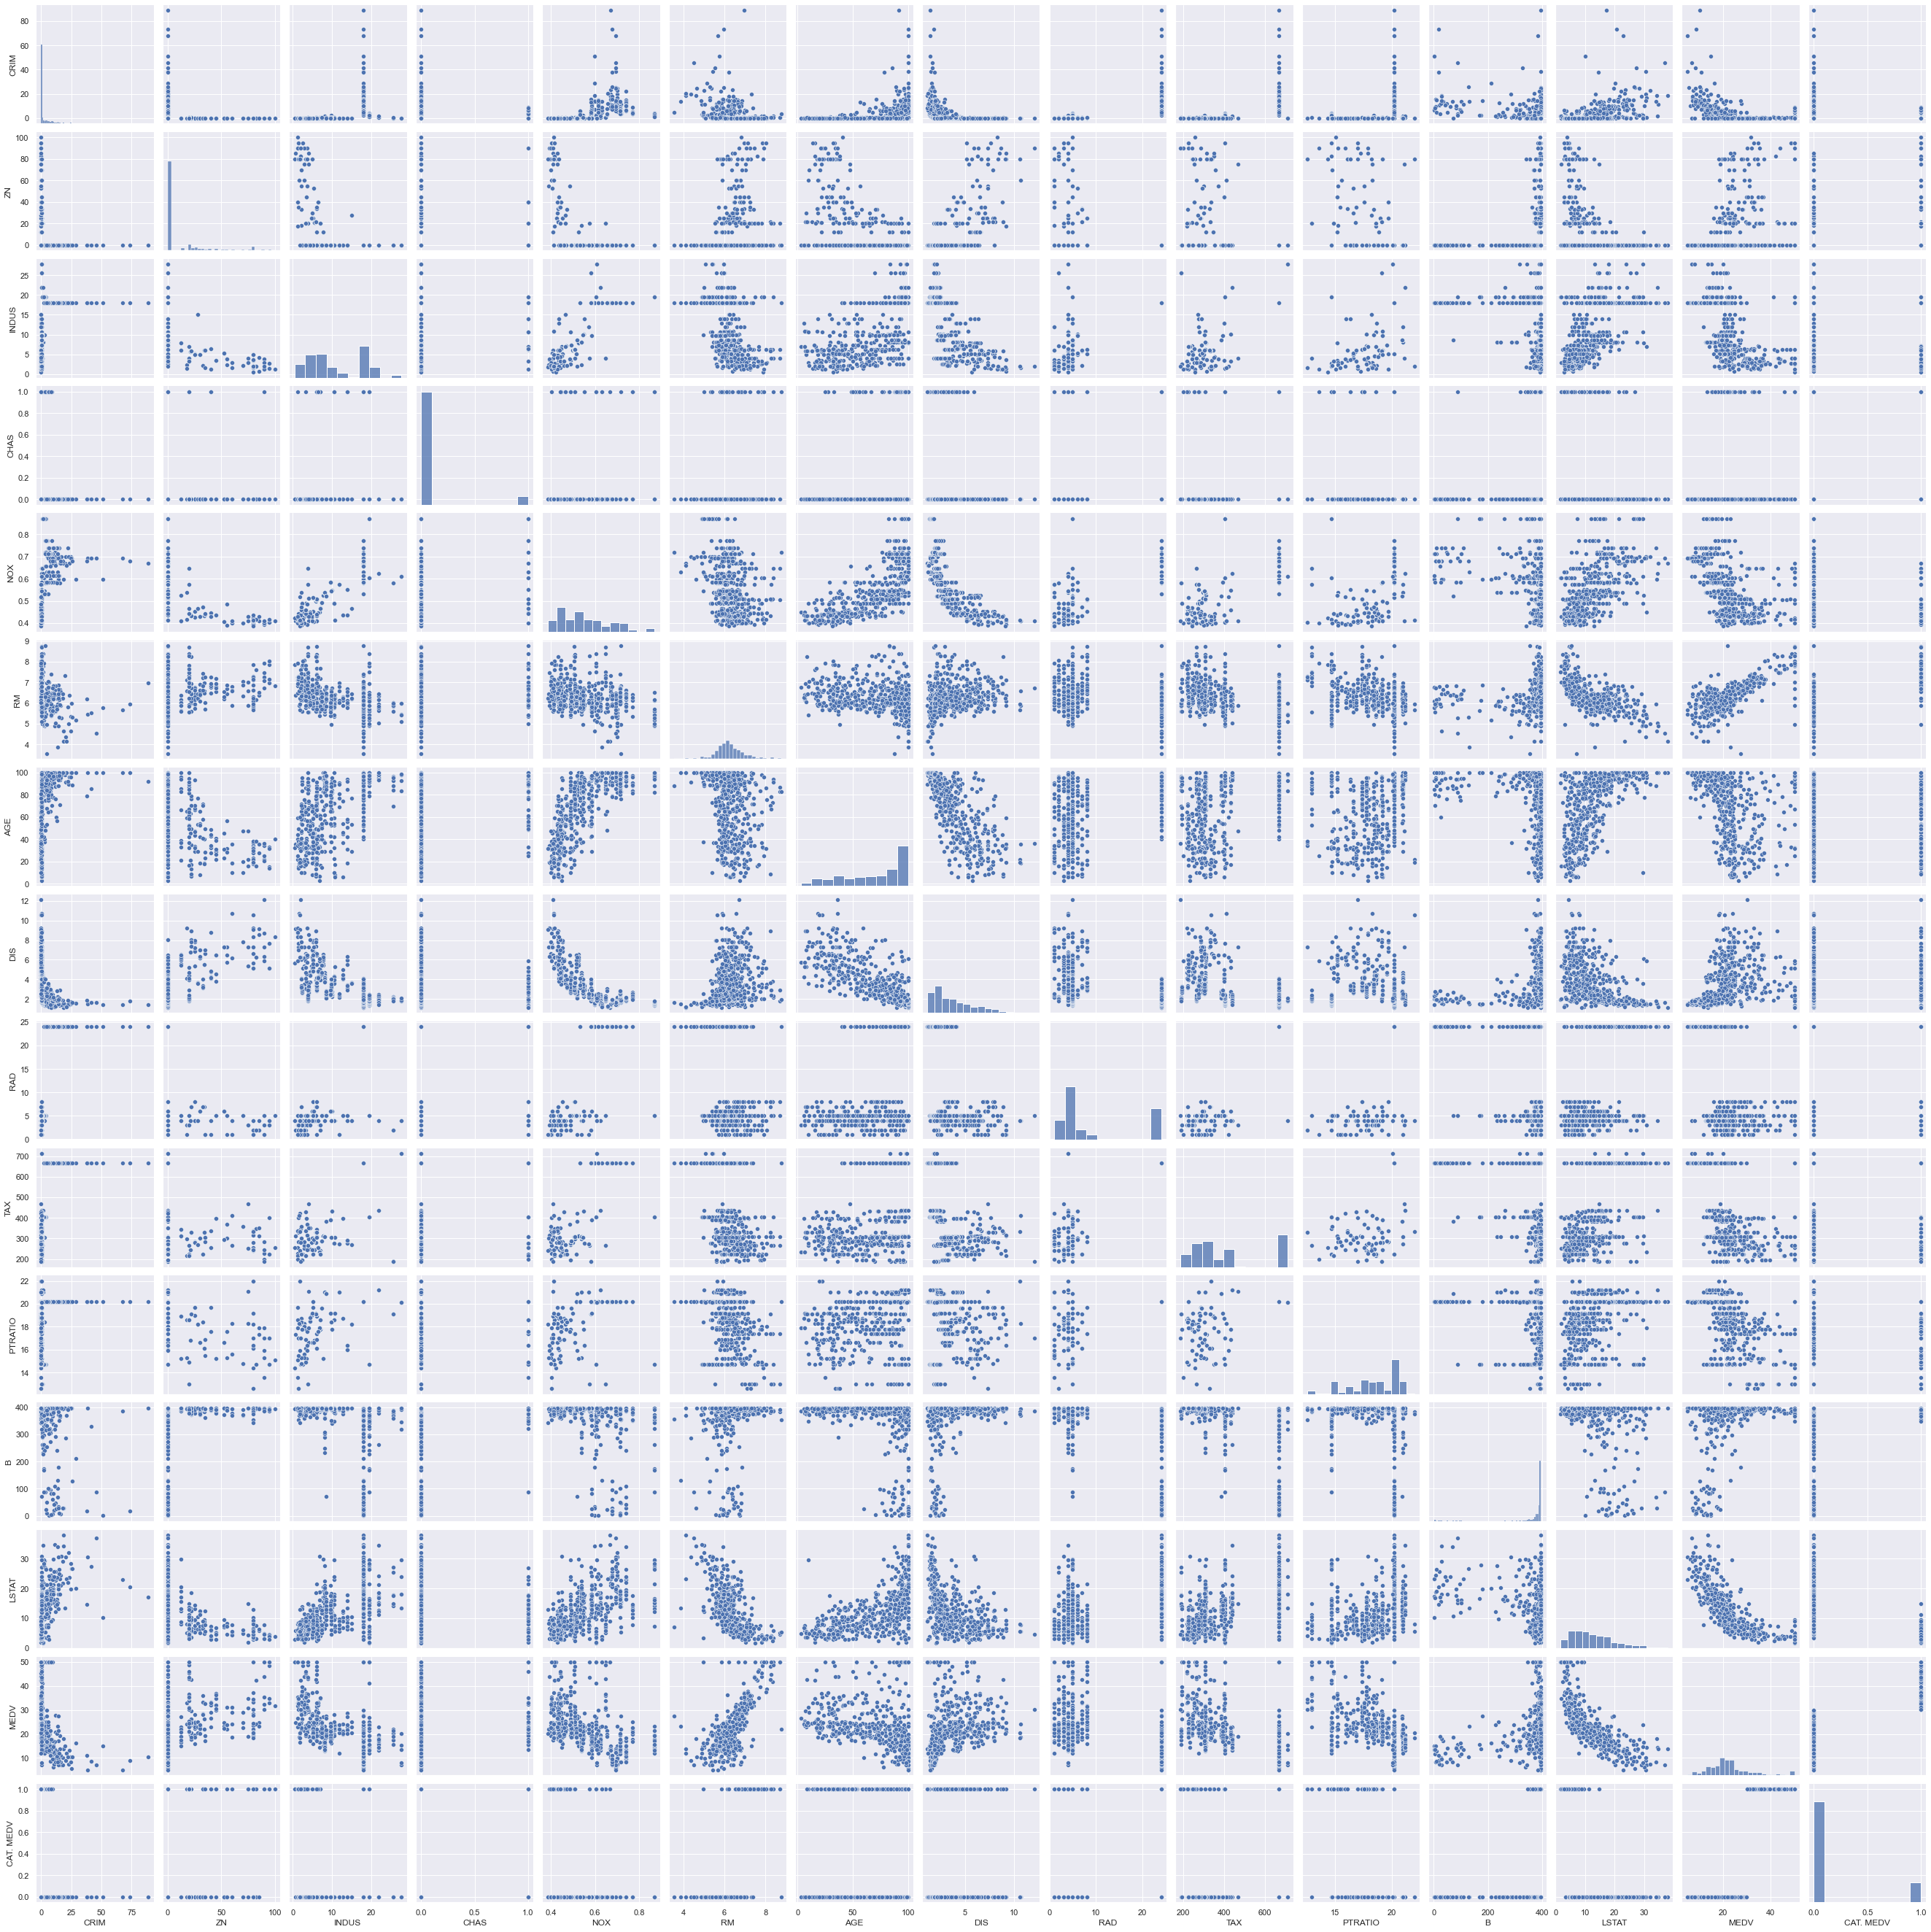

In [15]:
# 변수간 상관관계 시각화 

sns.pairplot(house_pdf)

In [16]:
# [+] 변수간 상관계수 출력
house_pdf.corr(method='pearson')
# 모든 변수가 중요하진 않음. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


In [17]:
# [+] 목표 변수와의 상관계수 출력
house_pdf.corr(method='pearson')['MEDV'] # ['MEDV']는 인덱싱한거임
# 여기서 나오는 상관계수로 변수 채택
# 예측하고자하는 값 'MEDV' 과 다른 변수 간의 상관관계 볼 수 있음.
# -1 ~ 1의 범주로 상관관계가 나오는데 1이 좋은 것이 아니라 절댓값이 큰 게 좋은 것(음/양 상관X). 
# 근데 0에 가까운 계수는 예측변수와 거의 상관없다는 것

CRIM        -0.388305
ZN           0.360445
INDUS       -0.483725
CHAS         0.175260
NOX         -0.427321
RM           0.695360
AGE         -0.376955
DIS          0.249929
RAD         -0.381626
TAX         -0.468536
PTRATIO     -0.507787
B            0.333461
LSTAT       -0.737663
MEDV         1.000000
CAT. MEDV    0.789789
Name: MEDV, dtype: float64

In [ ]:
# VectorAssember: DataFrame 의 column 을 특징 벡터(feature vector)로 변환
from pyspark.ml.feature import VectorAssembler

In [ ]:
# 특징 벡터화 하고자 하는 변수들을 선택
vectorAssembler = VectorAssembler(inputCols=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
    outputCol = 'features')


In [ ]:
# [+] 특징 벡터화된 새로운 DataFrame으로 변환
vhouse_df = vectorAssembler.transform(house_df)
# vector assembler도 transform이다.

In [ ]:
vhouse_df.toPandas()

In [ ]:
vhouse_df = vhouse_df.select(['features', 'MEDV'])
# vector assembler도 transform이다.

In [ ]:
vhouse_df.show()

In [ ]:
# [+] 훈련/테스트 데이터셋을 7대3 비율로 구성
train_df, test_df = vhouse_df.randomSplit([0.7, 0.3]) # randomSplit 무작위로 표본 추출

In [ ]:
"""
    Linear Regression
"""

from pyspark.ml.regression import LinearRegression

In [ ]:
"""
    선형회귀 모델 매개변수 설정
    - featureCol: 특징 컬럼
    - labelCol: 목표변수 컬럼
    - maxIter: 최대 학습횟수
    - regParam: 정규화 매개변수
    - elasticNetParam: 정규화 매개변수2
"""

lr = LinearRegression(
    featuresCol = 'features', 
    labelCol='MEDV', 
    maxIter=10, 
    regParam=0.3, 
    elasticNetParam=0.8)

# featuresCol : vector assembler로 만든거 쓸 것
# regParam과 elasticNetParam은 과적합 막아줌

In [ ]:
# [+] 모델 학습
lr_model = lr.fit(train_df)

In [ ]:
# 회귀계수(가중치)와 intercept(bias) 값 출력
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

In [ ]:
# 모델 학습결과 출력
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

# RMSE : 실제값과 예측값 간의 오차_ 0에 가까울수록 좋은 것

In [ ]:
train_df.describe().show()

In [ ]:
lr_predictions = lr_model.transform(train_df)
# 학습 train데이터에 대한 prediction을 구해서 모델이 학습 잘 학습 되었는가 확인

In [ ]:
y_train = lr_predictions.toPandas()['MEDV']
y_hat_train = lr_predictions.toPandas()['prediction']

In [ ]:
# 산점도 시각화

from matplotlib import pyplot as plt

# scatter plot
fig, ax = plt.subplots()
ax.scatter(y_train, y_hat_train, 10)   # 10: marker size
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', lw=1, color='black')
ax.set_xlabel('Observations')
ax.set_ylabel('Predictions')
plt.show()

# 가격 높은 구간에서 예측 잘 못한는 것을 볼 수 있음.(주택가격 높이는 변수들이 부족했음. 해봤자 방 개수. 이런게 보완되면 잘 예측할 수 있어 개선될 수 있음 )

In [ ]:
# [+] 모델 예측
lr_predictions = lr_model.transform(test_df)

In [ ]:
lr_predictions.select("prediction","MEDV","features").show()

In [ ]:
# 모델 성능 측정을 위한 evaluator 생성
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="MEDV",metricName="r2")


In [ ]:
# 결정계수 측정
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

In [ ]:
# RMSE 측정
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

In [ ]:
# 산점도 시각화
y_train = lr_predictions.toPandas()['MEDV']
y_hat_train = lr_predictions.toPandas()['prediction']

fig, ax = plt.subplots()
ax.scatter(y_train, y_hat_train, 10)   # 10: marker size
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', lw=1, color='black')
ax.set_xlabel('Observations')
ax.set_ylabel('Predictions')
plt.show()

# 만든 모델의 실제 성능 출력(위에서는 과거의 데이터 기준이었음)
# 훈련 성능보다 예측 성능이 더 좋게 나옴. 하지만 대부분의 모델이 이러냐? 절대 아님. 30%의 데이터의 성능이 70% 데이터의 성능보다 잘 나왔음. 근데 일반적이진 않음
# 근데 왜 이렇게 좋게 나오나? 집값이 높을 떄의 데이터가 적기 때문에 그럴 수 있음.

In [ ]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()